In [11]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import scipy.io as sio
import utils

from sklearn.utils import shuffle
from cycler import cycler

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import seaborn

## 1.1 Load data

In [2]:
FEATURE_PATH = "./Salinas_corrected.mat"
LABEL_PATH = "./Salinas_gt.mat"

features = loadmat(FEATURE_PATH)['salinas_corrected'].reshape((-1, 204))
labels = loadmat(LABEL_PATH)['salinas_gt'].reshape((-1))

features_shuffled, labels_shuffled = shuffle(features, labels)

print("features shape: ", features.shape)
print("labels shape: ", labels.shape)
print("feature shuffled shape: ", features_shuffled.shape)
print("labels shuffled shape: ", labels_shuffled.shape)

features shape:  (111104, 204)
labels shape:  (111104,)
feature shuffled shape:  (111104, 204)
labels shuffled shape:  (111104,)


## 1.2 Feature Visulization 

In [3]:
legends = [str(i) for i in range(17)]
custom_cycler = (cycler(color=['c','m','y','k','r','g']) * 
                cycler(linestyle=['-', '--', ':', '-.']))

### 1.2.1 Mean Feature Vectors

In [4]:
feature_means = [np.zeros(204)] * 17
feature_counts = [0] * 17
for (feature, label) in zip(features, labels):
    feature_means[label] += feature
    feature_counts[label] += 1

for i in range(17):
    feature_means[i] = feature_means[i] / feature_counts[i]

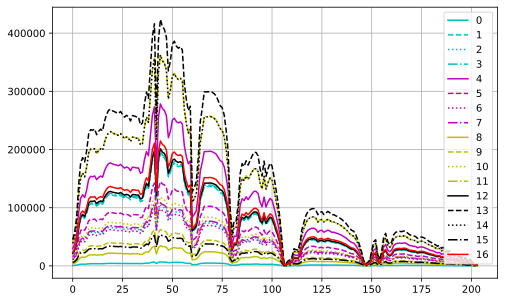

In [5]:
utils.plot(feature_means, legend=legends, figsize=(8, 5), cycler=custom_cycler)

In [6]:
print("features shape: ", features.shape)
print("labels shape: ", labels.shape)

features shape:  (111104, 204)
labels shape:  (111104,)


## 1.2.2 Box graph of 15 chosen features

              1          2         3         4         5         6         7   \
35617  12.259064  -4.087623  1.704027  0.603104 -0.268404 -1.063985 -0.338823   
5805   16.464402  -0.250220  2.437611  1.655494 -0.331321 -0.348598  0.064849   
34857   4.682112  -0.482353 -2.149171  3.125852 -1.139820  0.223739 -0.192674   
19614  19.952868   4.074833  2.573733  0.465330 -0.066381 -1.238412  0.219505   
20953 -18.285178  12.127557  3.131506  0.268500 -0.245017  0.773586 -0.426050   

             8         9         10        11        12        13        14  \
35617 -0.732462 -0.284665 -0.303827  0.260848 -0.174434  0.102686  0.164282   
5805  -0.658697 -0.192885  0.016986 -0.073360 -0.180479 -0.083618 -0.060668   
34857  0.107417  0.398463 -0.281144  0.619223 -0.817334  0.517688 -0.179352   
19614 -0.614058 -0.152125 -0.410048 -0.238133  0.009748 -0.140803 -0.132465   
20953 -0.561080  1.230893  0.390982 -0.598048 -0.260599  0.504019  0.130371   

             15  
35617  0.042574  
58

<AxesSubplot:>

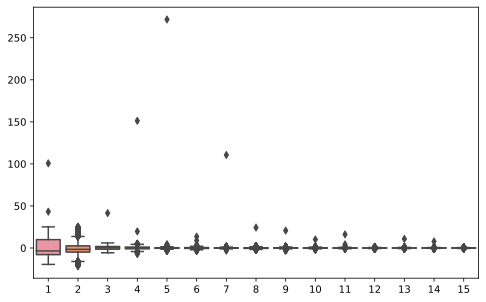

In [16]:
X_train= sio.loadmat('../data/X_train.mat')['X_train']
X = X_train
a = pd.DataFrame(X, columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print(a.sample(5))
seaborn.boxplot(data= a)